# <p style="text-align:center">Travail personel 2: Résolution d'équation non-linéare</p> #

Présenté par l'équipe 9: **Mathieu Dumais**, **Antoine Rousseau** et **Gabriel Lapointe**.

Présenté à **Philippe Després**.

Date: **26 février 2021**.


## Question 1 ###

Nous cherchons la position des points de rebroussement ($x$) ou, en d'autre mots, la position maximal et minimal d'une particules relativement à une autre lors  d'une interaction inter-nucléaire, en fonction de l'énergie discrète totale de l'intéraction ($\epsilon_n$). Sachant que la vitesse est nul lorsque les extrémités de mouvement sont atteind, l'énergie consiste tout simplement à l'énergie potentiel, exprimé dans notre cas par le potentiel de Lennard-Jones:
\begin{equation}
    \Rightarrow v(x)=4\left[\left(\frac{1}{x}\right)^{12} - \left(\frac{1}{x}\right)^6\right]
\end{equation}
(à noter que les énergies utilisées dans ce numéro sont des ratios de l'énergie en question par rapport à la profondeur du puit de potentiel de la liaison intermoléculaire $V_0$)

Ainsi, nous pouvons isoler $x$ dans l'équation suivante:
\begin{equation}
    \Rightarrow \epsilon_n = 4\left[\left(\frac{1}{x}\right)^{12} - \left(\frac{1}{x}\right)^6\right]
\end{equation}
Nous donnant:
\begin{equation}
    \Rightarrow x = \pm \left[2^{1/6} \left(-\frac{\sqrt{\epsilon_n + 1} + 1}{\epsilon_n}\right)^{1/6}\right]
\end{equation}

Le dernier résultat fut solvé sur Wolfram Alpha lorsque l'énergie $\epsilon_n\ne 0$

## Question 2 ###

## Question 3 ###

## Question 4 ###

## Question 5 ###

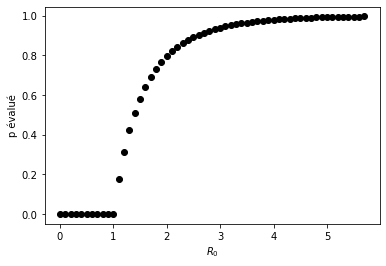

In [1]:
import numpy as np
import matplotlib.pyplot as plt

R0_list = np.linspace(0, 5.7, 58) # Liste des R0 pour lesquels p sera évalué
p_list = []
p_initial = 1

# Définition de l'équation qui modélise une pandémie
def RHS(p,R0):
    next_p = 1-np.exp(-R0*p) 
    return next_p

# Fonction qui opère la methode de relaxation afin d'obtenir une précision voulue (target)
def relaxation(R0, target = 1e-8):
    p = p_initial
    p_old = 1000
    
    while np.abs(p-p_old) > target:        
        p_old = p
        p = RHS(p, R0)    
    
    return p

# Création de la liste ccontenant les valeurs de p correspondant aux valeurs de R0 déterminées
for R0 in R0_list:
    p_list += [relaxation(R0)]

# Réalisation du graphique de p selon R0
plt.plot(R0_list, p_list, "ko");
plt.xlabel('$R_{0}$')
plt.ylabel('p évalué')
plt.show()

## Question 6 ###

 x* est la solution de l'équation originale.
  
 x' est la valeur du prochain estimé.
  
 On a donc que x* = x + $\epsilon$. $\epsilon$ est la différence entre x et x*.
 
 Près de x*, on a que:
 
 $\epsilon' = \epsilon f'(x^*)$.
 
 On a donc
 
 $x^* = x + \frac{\epsilon'}{f'(x^*)} = x' + \epsilon'$
 
 $x - x' = \frac{-\epsilon'}{f'(x^*)} + \epsilon'$
 
 $x - x' = \epsilon' \left(1 - \frac{1}{f'(x^*)}\right)$
 
 $\epsilon ' = \frac{x - x'}{1 - \frac{1}{f'(x^*)}}$.
 
 On sait que $x' = f(x)$ et que $x' = (1 + \omega)f(x) -\omega x$, donc:
 
 $f(x) = (1 + \omega)f(x) - \omega x$
 
 $f'(x) = (1 + \omega)f'(x) - \omega$.
 
 Ici, on suppose que $f'(x) = f'(x^*)$ puisque x est près de x*. On obtient alors:
 
 $f'(x^*) = (1 + \omega)f'(x) - \omega$.
 
 En substituant, on obtient:
 
 $\epsilon ' = \frac{x - x'}{1 - \frac{1}{(1 + \omega)f'(x) - \omega}}$
 
 CQFD

## Question 7 & 8 ###

nombre d'itérations nécessaire pour obtenir une précision sur p de 10e-6 par la méthode de ralaxation: 14
nombre d'itérations nécessaire pour obtenir une précision sur p de 10e-6 par la méthode de ralaxation accélérée: 4


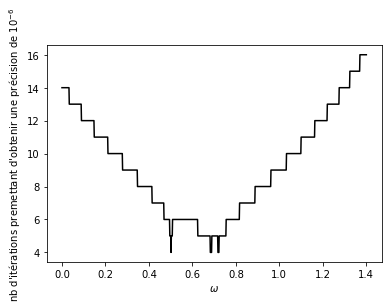

In [2]:
import numpy as np
import matplotlib.pyplot as plt


R0 = 2
p_list = []
n_list = []
p_initial = 1

# Définition de l'équation qui modélise une pandémie
def RHS(p,R0):
    next_p = 1-np.exp(-R0*p) 
    return next_p

# Fonction qui opère la methode de relaxation afin d'obtenir une précision voulue (target)
def relaxation(R0, target = 1e-6):
    p = p_initial
    p_old = 1000
    n = 0
    
    while np.abs(p-p_old) > target:        
        p_old = p
        p = RHS(p, R0)    
        n += 1
    
    return p,n

# Fonction qui opère la methode de relaxation accélérée afin d'obtenir une précision voulue (target)
def relaxation_accel(R0, w, target = 1e-6):
    p = p_initial
    p_old = 1000
    n = 0
    
    while np.abs(p-p_old) > target:        
        p_old = p
        p = (1+w)*RHS(p, R0) - w*p
        n += 1
    
    return p, n

# Liste des w pour lesquels le nombre d'itération permettant d'obtenir une précision de 10^-6 sera évalué
w_list = np.linspace(0, 1.4, 1000)

# Liste contenant le nombre d'itération permettant d'obtenir une précision de 10^-6 pour un w donné
for w in w_list:
    n_list += [relaxation_accel(R0, w)[1]]

print("nombre d'itérations nécessaire pour obtenir une précision sur p de 10e-6 par la méthode de ralaxation: " + str(relaxation(R0)[1]))
print("nombre d'itérations nécessaire pour obtenir une précision sur p de 10e-6 par la méthode de ralaxation accélérée: " + str(relaxation_accel(R0, 0.685)[1]))

# Représentation graphique du nombre d'itération permettant d'obtenir une précision de 10^-6 selon w
plt.plot(w_list, n_list, "k");
plt.xlabel('$\omega$')
plt.ylabel("nb d'itérations premettant d'obtenir une précision de $10^{-6}$")
plt.show()

## Question 9###

# Références

[1] M. E. Newman, Computational Physics. CreateSpace, 2013.